In [2]:
import pandas as pd
import numpy as np
import math
from math import sqrt
import random
from tqdm import tqdm

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from mlxtend.classifier import OneRClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import keras as kr
from keras.models import Sequential
from keras.layers import Dense
from sklearn.svm import SVR

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA

from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Q1. Read the article and reproduce the results presented in Table(4) using Python modules and packages. Write a report summarising the dataset, used ML methods, experiment protocol and results including variations, if any. 

__Dataset__
* The Dataset is comprised of 13 clinical features.
* The researchers are trying to select the best classifier to predict the Death Event (target variable).

__Data Pre-processing__ 
* The data is imported as it is.
* The researchers drop the ‘time’ column from the dataset.
* The researchers then sort the columns so that the target variable is located the furthest far right column   

__Models__

The researchers selected the following models:
* Random Forest 
* Decision Tree 
* Gradient boosting : XGBoost
* Linear regression 
* One rule 
* Artificial neural network
* Naïve bayes 
* SVM radial 
* SVM linear
* k-nearest neighbours.

__Train/Test Split Stratergy__

The researchers utilised the following train/test split strategy for the machine learning models:

* 6:4 – applied to (Neural network, Support Vector Machine, and k-Nearest Neighbours), 
    * 60% for the training set. 
    *  20% for the validation set. 
    *  20% for the test set.
* 8:2 - applied to (Random Forests, One Rule, Linear Regression, Naïve Bayes, and Decision Tree)
    * 80%  for the training set, 
    * 20%  for the test set.

__Hyperparameters__ 

The researchers decided to pick the following models that require hyperparameters: 
* Artificial neural network 
* SVM radial
* SVM linear 
* k-nearest neighbours

The researchers used the Grid Search method to find hyperparameters based on precision for the following parameters. They shuffled the data rows once before splitting the data based on the train/test split strategy and the test the below ML models for the best hyperparameters.

* Artificial neural network - Hyper Parameters: 1 Hidden layer, 100 hidden units 
* SVM radial - Hyper Parameters: Support Vector Machine with radial Gaussian kernel, C = 10
* SVM linear - Hyper Parameters: Support Vector Machine with linear kernel, C = 0.1
* k-nearest neighbours - Hyper Parameters: K = 3

__Evaluation Metric__

The researchers utilised the follow metrics to evaluate the machine learning models:
* MCC: Matthews correlation coefficient. Threshold rate for the metric: τ = 0.5
* F1: Harmonic Mean. Threshold rate for the metric: τ = 0.5
*  Accuracy. Threshold rate for the metric: τ = 0.5
*  TP:  true positive rate (sensitivity, recall). Threshold rate for the above metric: τ = 0.5 
*  TN:  true negative rate (specificity).  Threshold rate for the above metric: τ = 0.5
* PR AUC
*  ROC AUC

__Model Strategy__

The researchers used the following method to test their models:

* The follow steps were encompassed inside a loop that ran 100 times
    * Loop Begins
        * They randomly shuffled the rows of the data set once before splitting the data.
        * They split the data based on what model they used, 8:2 or 6:4
        * They built, fit and used the selected model to make a prediction.
        * From that prediction they calculated the evaluation metrics.
    * Loop Ends

After looping 100 times, the evaluation metrics (100, one for each run of the loop) are collated and the average of each metric category is calculated and returned. The researchers then compared the mean metric result of each model loop and evaluated which model performed the best for each category.

__My Results__

|Model|MCC|F1 score|Accuracy|TP rate|TN rate|PR AUC|ROC AUC|
|---|---|---|---|---|---|---|---|
|Random Forest|0.362|0.529|0.731|0.471|0.862|0.475|0.666|
|Gradient Boosting|0.341|0.527|0.721|0.506|0.823|0.45|0.665|
|Linear Regression|0.353|0.736|0.736|0.394|0.904|0.47|0.653|
|Decision Tree|0.271|0.5|0.68|0.515|0.757|0.416|0.636|
|Naïve Bayes|0.245|0.336|0.707|0.239|0.934|0.404|0.586|
|One rule|0.192|0.043|0.655|0.026|0.95|0.322|0.488|
|SVM Radial|0.045|0.002|0.672|0.001|0.993|0.323|0.497|
|SVM Linear|0.038|0.676|0.676|0.27|0.989|0.318|0.498|
|K-nearest Neighbours|0.007|0.188|0.63|0.14|0.864|0.325|0.502|
|Artificial Neural Network|0.0|0.669|0.669|0.01|0.99|0.341|0.506|


__Variations__
* The sklearn threshold is always set at t = 5, there was no need to define it in my model.
	Of course, since my shuffle mechanism is random and so is the article’s method for dataset splitting, my results will vary based on the rows selected.
*	The Grid Search algo crashes my kernel, I am unable to execute the kernel with the grid search. I have used the provided hyperparameters from the article for the machine learning models that require them. I separated the grid search for hyperparameters into it’s own cell.  



In [3]:
# Import the data.
base=pd.read_csv (r"C:\Users\shane\Desktop\Study\University\T2 2021\SIT720 Assignments\A5\heart_failure_clinical_records_dataset.csv")

In [4]:
# Drop 'Time' column.
base = base.drop('time',axis=1)

In [5]:
# Rearrange columns to match Github example. 
df = base[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase','DEATH_EVENT']]
df

,sex,smoking,diabetes,high_blood_pressure,anaemia,age,ejection_fraction,serum_sodium,serum_creatinine,platelets,creatinine_phosphokinase,DEATH_EVENT
0,1,0,0,1,0,75.0,20,130,1.9,265000.00,582,1
1,1,0,0,0,0,55.0,38,136,1.1,263358.03,7861,1
2,1,1,0,0,0,65.0,20,129,1.3,162000.00,146,1
3,1,0,0,0,1,50.0,20,137,1.9,210000.00,111,1
4,0,0,1,0,1,65.0,20,116,2.7,327000.00,160,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1,1,1,0,62.0,38,143,1.1,155000.00,61,0
295,0,0,0,0,0,55.0,38,139,1.2,270000.00,1820,0
296,0,0,1,0,0,45.0,60,138,0.8,742000.00,2060,0
297,1,1,0,0,0,45.0,38,140,1.4,140000.00,2413,0


In [6]:
shuffle = df.sample(frac=1)
x = shuffle[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
y = shuffle[['DEATH_EVENT']]
# train and test split the dataframe based on 6/4 split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
y_train=np.ravel(y_train)
# Set the parameters by cross-validation
Lparameters = [{'kernel': ['linear'], 'C': [0.001,0.01,0.1,1,10]}]
Rparameters = [{'kernel': ['rbf'], 'C': [0.001,0.01,0.1,1,10]}]
Kparameters = [{'n_neighbors' : [3,5,7]}]

# Run the Grid Searches to return best parameters for models.
lgs = GridSearchCV(SVC(), Lparameters, scoring="accuracy")
lgs.fit(x_train, y_train)
print(lgs.best_params_)

rgs = GridSearchCV(SVR(), Rparameters, scoring="accuracy")
tqdm(rgs.fit(x_train, y_train.round()))
print(rgs.best_params_)

kgs = GridSearchCV(KNeighborsClassifier(), Kparameters, scoring="accuracy")
tqdm(kgs.fit(x_train, y_train))
print(kgs.best_params_)

{'C': 10, 'kernel': 'linear'}


0it [00:00, ?it/s]


{'C': 0.001, 'kernel': 'rbf'}


0it [00:00, ?it/s]


{'n_neighbors': 3}


In [7]:
# MCC Calc to deal with double scaler error.
def mcc(tp, fp, tn, fn):

    # https://stackoverflow.com/a/56875660/992687
    mc = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if mc == 0:
        mc = 1
    return ((tp * tn) - (fp * fn)) / sqrt(mc)

In [8]:
# 80 / 20 Model: RANDOM FOREST
# Declare array for metrics
RFarray = np.empty([0,7],int)

# Run a loop 100 times
for i in tqdm(range(100)):
    # Shuffle the dataframe 
    shuffle1 = df.sample(frac=1)
    x1 = shuffle1[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y1 = shuffle1['DEATH_EVENT']
    # train and test split the dataframe based on 8/2 split
    x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2)
    # run model and get prediction variable
    rfc=RandomForestClassifier()
    rfc.fit(x_train1,y_train1)
    y_pred1=rfc.predict(x_test1)
    # return metrics on each prediction 
    m1 = matthews_corrcoef(y_test1, y_pred1)
    m2 = f1_score(y_test1, y_pred1)
    m3 = accuracy_score(y_test1, y_pred1)
    c1 = confusion_matrix(y_test1, y_pred1)
    m4 = TP1 = c1[1][1] / (c1[1][1]+c1[1][0])
    m5 = TN1 = c1[0][0] / (c1[0][0]+c1[0][1])
    m6 = average_precision_score(y_test1, y_pred1)
    m7 = roc_auc_score(y_test1,y_pred1)
    # populate metrics into dataframe
    RFarray = np.append(RFarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel1 = pd.DataFrame(RFarray)
MLmodel1.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum1 = MLmodel1.mean(axis=0)
MLSum1 = pd.DataFrame(MLSum1)
MLSum1 = MLSum1.transpose()

# Cleaning up the results
ML1 = MLSum1.rename(index={0:'Random forest'})
ML1['MCC']=ML1['MCC'].round(decimals = 3)
ML1['F1 score']=ML1['F1 score'].round(decimals = 3)
ML1['Accuracy']=ML1['Accuracy'].round(decimals = 3)
ML1['TP rate']=ML1['TP rate'].round(decimals = 3)
ML1['TN rate']=ML1['TN rate'].round(decimals = 3)
ML1['PR AUC']=ML1['PR AUC'].round(decimals = 3)
ML1['ROC AUC']=ML1['ROC AUC'].round(decimals = 3)
ML1

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.71it/s]


,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Random forest,0.362,0.529,0.731,0.471,0.862,0.475,0.666


In [8]:
# 80 / 20 Model: DECISION TREE 
# Declare array for metrics
DTarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle2 = df.sample(frac=1)
    x2 = shuffle2[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y2 = shuffle2[['DEATH_EVENT']]
    # train and test split the dataframe based on 8/2 split
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2)
    # run model and get prediction variable
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train2,y_train2)
    y_pred2=dtc.predict(x_test2)
    # return metrics on each prediction 
    m1 = matthews_corrcoef(y_test2, y_pred2)
    m2 = f1_score(y_test2, y_pred2)
    m3 = accuracy_score(y_test2, y_pred2)
    c2 = confusion_matrix(y_test2, y_pred2)
    m4 = TP2 = c2[1][1] / (c2[1][1]+c2[1][0])
    m5 = TN2 = c2[0][0] / (c2[0][0]+c2[0][1])
    m6 = average_precision_score(y_test2, y_pred2)
    m7 = roc_auc_score(y_test2,y_pred2)
    # populate metrics into dataframe
    DTarray = np.append(DTarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel2 = pd.DataFrame(DTarray)
MLmodel2.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum2 = MLmodel2.mean(axis=0)
MLSum2 = pd.DataFrame(MLSum2)
MLSum2 = MLSum2.transpose()

# Cleaning up the results
ML2 = MLSum2.rename(index={0:'Decision tree'})
ML2['MCC']=ML2['MCC'].round(decimals = 3)
ML2['F1 score']=ML2['F1 score'].round(decimals = 3)
ML2['Accuracy']=ML2['Accuracy'].round(decimals = 3)
ML2['TP rate']=ML2['TP rate'].round(decimals = 3)
ML2['TN rate']=ML2['TN rate'].round(decimals = 3)
ML2['PR AUC']=ML2['PR AUC'].round(decimals = 3)
ML2['ROC AUC']=ML2['ROC AUC'].round(decimals = 3)
ML2

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Decision tree,0.271,0.5,0.68,0.515,0.757,0.416,0.636


In [9]:
# 80 / 20 Model: XGBOOST
# Declare array for metrics
XGarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle3 = df.sample(frac=1)
    x3 = shuffle3[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y3 = shuffle3['DEATH_EVENT']
    # train and test split the dataframe based on 8/2 split
    x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.2)
    # run model and get prediction variable
    xgc=xgb.XGBClassifier(verbosity=0,use_label_encoder=False)
    xgc.fit(x_train3,y_train3)
    y_pred3=xgc.predict(x_test3)
    # return metrics on each prediction 
    m1 = matthews_corrcoef(y_test3, y_pred3)
    m2 = f1_score(y_test3, y_pred3)
    m3 = accuracy_score(y_test3, y_pred3)
    c3 = confusion_matrix(y_test3, y_pred3)
    m4 = TP3 = c3[1][1] / (c3[1][1]+c3[1][0])
    m5 = TN3 = c3[0][0] / (c3[0][0]+c3[0][1])
    m6 = average_precision_score(y_test3, y_pred3)
    m7 = roc_auc_score(y_test3,y_pred3)
    # populate metrics into dataframe
    XGarray = np.append(XGarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel3 = pd.DataFrame(XGarray)
MLmodel3.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum3 = MLmodel3.mean(axis=0)
MLSum3 = pd.DataFrame(MLSum3)
MLSum3 = MLSum3.transpose()

# Cleaning up the results
ML3 = MLSum3.rename(index={0:'Gradient boosting'})
ML3['MCC']=ML3['MCC'].round(decimals = 3)
ML3['F1 score']=ML3['F1 score'].round(decimals = 3)
ML3['Accuracy']=ML3['Accuracy'].round(decimals = 3)
ML3['TP rate']=ML3['TP rate'].round(decimals = 3)
ML3['TN rate']=ML3['TN rate'].round(decimals = 3)
ML3['PR AUC']=ML3['PR AUC'].round(decimals = 3)
ML3['ROC AUC']=ML3['ROC AUC'].round(decimals = 3)
ML3

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Gradient boosting,0.341,0.527,0.721,0.506,0.823,0.45,0.665


In [10]:
# 80 / 20 Model: LINEAR REGRESSION
# Declare array for metrics
LRarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle4 = df.sample(frac=1)
    x4 = shuffle4[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y4 = shuffle4[['DEATH_EVENT']]
    # train and test split the dataframe based on 8/2 split
    x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.2)
    # run model and get prediction variable
    lrg=LinearRegression()
    lrg.fit(x_train4,y_train4)
    y_pred4=lrg.predict(x_test4)
    # return metrics on each prediction 
    m1 = matthews_corrcoef(y_test4, y_pred4.round())
    m2 = f1_score(y_test4, y_pred4.round(),average='micro')
    m3 = accuracy_score(y_test4, y_pred4.round())
    c4 = confusion_matrix(y_test4, y_pred4.round())
    m4 = TP4 = c4[1][1] / (c4[1][1]+c4[1][0])
    m5 = TN4 = c4[0][0] / (c4[0][0]+c4[0][1])
    m6 = average_precision_score(y_test4, y_pred4.round())
    m7 = roc_auc_score(y_test4,y_pred4.round())
    # populate metrics into dataframe
    LRarray = np.append(LRarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel4 = pd.DataFrame(LRarray)
MLmodel4.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum4 = MLmodel4.mean(axis=0)
MLSum4 = pd.DataFrame(MLSum4)
MLSum4 = MLSum4.transpose()

# Cleaning up the results
ML4 = MLSum4.rename(index={0:'Linear regression'})
ML4['MCC']=ML4['MCC'].round(decimals = 3)
ML4['F1 score']=ML4['F1 score'].round(decimals = 3)
ML4['Accuracy']=ML4['Accuracy'].round(decimals = 3)
ML4['TP rate']=ML4['TP rate'].round(decimals = 3)
ML4['TN rate']=ML4['TN rate'].round(decimals = 3)
ML4['PR AUC']=ML4['PR AUC'].round(decimals = 3)
ML4['ROC AUC']=ML4['ROC AUC'].round(decimals = 3)
ML4

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Linear regression,0.353,0.736,0.736,0.394,0.904,0.47,0.653


In [9]:
# 80 / 20 Model: ONE RULE
# Declare array for metrics
ORarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle5 = df.sample(frac=1)
    x5 = shuffle5[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y5 = shuffle5[['DEATH_EVENT']]
    y5 = np.ravel(y5)
    # train and test split the dataframe based on 8/2 split
    x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5, test_size=0.2)
    x_train5 = x_train5.to_numpy()
    x_test5 = x_test5.to_numpy()
    # run model and get prediction variable
    orc=OneRClassifier()
    orc.fit(x_train5,y_train5)
    y_pred5=orc.predict(x_test5)
    # return metrics on each prediction 
    c5 = confusion_matrix(y_test5, y_pred5)
    m1 = mcc(c5[0][0],c5[1][0],c5[0][1],c5[1][1])
    m2 = f1_score(y_test5, y_pred5)
    m3 = accuracy_score(y_test5, y_pred5)
    m4 = TP5 = c5[1][1] / (c5[1][1]+c5[1][0])
    m5 = TN5 = c5[0][0] / (c5[0][0]+c5[0][1])
    m6 = average_precision_score(y_test5, y_pred5)
    m7 = roc_auc_score(y_test5,y_pred5)
    # populate metrics into dataframe
    ORarray = np.append(ORarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel5 = pd.DataFrame(ORarray)
MLmodel5.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum5 = MLmodel5.mean(axis=0)
MLSum5 = pd.DataFrame(MLSum5)
MLSum5 = MLSum5.transpose()

# Cleaning up the results
ML5 = MLSum5.rename(index={0:'One rule'})
ML5['MCC']=ML5['MCC'].round(decimals = 3)
ML5['F1 score']=ML5['F1 score'].round(decimals = 3)
ML5['Accuracy']=ML5['Accuracy'].round(decimals = 3)
ML5['TP rate']=ML5['TP rate'].round(decimals = 3)
ML5['TN rate']=ML5['TN rate'].round(decimals = 3)
ML5['PR AUC']=ML5['PR AUC'].round(decimals = 3)
ML5['ROC AUC']=ML5['ROC AUC'].round(decimals = 3)
ML5

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
One rule,0.192,0.043,0.655,0.026,0.95,0.322,0.488


In [30]:
# 80 / 20 Model: NAIVE BAYES
# Declare array for metrics
NBarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle6 = df.sample(frac=1)
    x6 = shuffle6[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y6 = shuffle6['DEATH_EVENT']
    # train and test split the dataframe based on 8/2 split
    x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6, test_size=0.2)
    # run model and get prediction variable
    nbg=GaussianNB()
    nbg.fit(x_train6,y_train6)
    y_pred6=nbg.predict(x_test6)
    # return metrics on each prediction 
    m1 = matthews_corrcoef(y_test6, y_pred6)
    m2 = f1_score(y_test6, y_pred6)
    m3 = accuracy_score(y_test6, y_pred6)
    c6 = confusion_matrix(y_test6, y_pred6)
    m4 = TP6 = c6[1][1] / (c6[1][1]+c6[1][0])
    m5 = TN6 = c6[0][0] / (c6[0][0]+c6[0][1])
    m6 = average_precision_score(y_test6, y_pred6)
    m7 = roc_auc_score(y_test6,y_pred6)
    # populate metrics into dataframe
    NBarray = np.append(NBarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel6 = pd.DataFrame(NBarray)
MLmodel6.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum6 = MLmodel6.mean(axis=0)
MLSum6 = pd.DataFrame(MLSum6)
MLSum6 = MLSum6.transpose()

# Cleaning up the results
ML6 = MLSum6.rename(index={0:'Naive bayes'})
ML6['MCC']=ML6['MCC'].round(decimals = 3)
ML6['F1 score']=ML6['F1 score'].round(decimals = 3)
ML6['Accuracy']=ML6['Accuracy'].round(decimals = 3)
ML6['TP rate']=ML6['TP rate'].round(decimals = 3)
ML6['TN rate']=ML6['TN rate'].round(decimals = 3)
ML6['PR AUC']=ML6['PR AUC'].round(decimals = 3)
ML6['ROC AUC']=ML6['ROC AUC'].round(decimals = 3)
ML6

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Naive bayes,0.245,0.336,0.707,0.239,0.934,0.404,0.586


In [9]:
# 60 / 40 Model: SVM 'LINEAR'
# Declare array for metrics
SLarray = np.empty([0,7],int)

# Run a loop 100 times
for i in tqdm(range(100)):
    # Shuffle the dataframe 
    shuffle7 = df.sample(frac=1)
    x7 = shuffle7[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y7 = shuffle7[['DEATH_EVENT']]
    y7 = np.ravel(y7)
    # train and test split the dataframe based on 8/2 split
    x_train7, x_test7, y_train7, y_test7 = train_test_split(x7, y7, test_size=0.4)
    # run model and get prediction variable
    svl=svm.SVR(C=10)
    svl.fit(x_train7,y_train7)
    y_pred7=svl.predict(x_test7)
    # return metrics on each prediction 
    c7 = confusion_matrix(y_test7.round(), y_pred7.round())
    m1 = mcc(c7[0][0],c7[1][0],c7[0][1],c7[1][1])
    m2 = f1_score(y_test7.round(), y_pred7.round(),average='micro')
    m3 = accuracy_score(y_test7.round(), y_pred7.round())
    m4 = TP7 = c7[1][1] / (c7[1][1]+c7[1][0])
    m5 = TN7 = c7[0][0] / (c7[0][0]+c7[0][1])
    m6 = average_precision_score(y_test7.round(), y_pred7.round())
    m7 = roc_auc_score(y_test7.round(),y_pred7.round())
    # populate metrics into dataframe
    SLarray = np.append(SLarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel7 = pd.DataFrame(SLarray)
MLmodel7.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum7 = MLmodel7.mean(axis=0)
MLSum7 = pd.DataFrame(MLSum7)
MLSum7 = MLSum7.transpose()

# Cleaning up the results
ML7 = MLSum7.rename(index={0:'SVM linear'})
ML7['MCC']=ML7['MCC'].round(decimals = 3)
ML7['F1 score']=ML7['F1 score'].round(decimals = 3)
ML7['Accuracy']=ML7['Accuracy'].round(decimals = 3)
ML7['TP rate']=ML7['TP rate'].round(decimals = 3)
ML7['TN rate']=ML7['TN rate'].round(decimals = 3)
ML7['PR AUC']=ML7['PR AUC'].round(decimals = 3)
ML7['ROC AUC']=ML7['ROC AUC'].round(decimals = 3)
ML7

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 78.43it/s]


,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
SVM linear,0.038,0.676,0.676,0.027,0.989,0.318,0.498


In [11]:
# 60 / 40 Model: SVM 'RADIAL'
# Declare array for metrics
SRarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle8 = df.sample(frac=1)
    x8 = shuffle8[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y8 = shuffle8[['DEATH_EVENT']]
    y8 = np.ravel(y8)
    # train and test split the dataframe based on 8/2 split
    x_train8, x_test8, y_train8, y_test8 = train_test_split(x8, y8, test_size=0.4)
    # run model and get prediction variable
    svr=svm.SVC(kernel='rbf',C=10)
    svr.fit(x_train8,y_train8)
    y_pred8=svr.predict(x_test8)
    # return metrics on each prediction 
    c8 = confusion_matrix(y_test8, y_pred8.round())
    m1 = mcc(c8[0][0],c8[1][0],c8[0][1],c8[1][1])
    m2 = f1_score(y_test8, y_pred8.round())
    m3 = accuracy_score(y_test8, y_pred8.round())
    m4 = TP8 = c8[1][1] / (c8[1][1]+c8[1][0])
    m5 = TN8 = c8[0][0] / (c8[0][0]+c8[0][1])
    m6 = average_precision_score(y_test8, y_pred8)
    m7 = roc_auc_score(y_test8,y_pred8)
    # populate metrics into dataframe
    SRarray = np.append(SRarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel8 = pd.DataFrame(SRarray)
MLmodel8.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum8 = MLmodel8.mean(axis=0)
MLSum8 = pd.DataFrame(MLSum8)
MLSum8 = MLSum8.transpose()

# Cleaning up the results
ML8 = MLSum8.rename(index={0:'SVM radial'})
ML8['MCC']=ML8['MCC'].round(decimals = 3)
ML8['F1 score']=ML8['F1 score'].round(decimals = 3)
ML8['Accuracy']=ML8['Accuracy'].round(decimals = 3)
ML8['TP rate']=ML8['TP rate'].round(decimals = 3)
ML8['TN rate']=ML8['TN rate'].round(decimals = 3)
ML8['PR AUC']=ML8['PR AUC'].round(decimals = 3)
ML8['ROC AUC']=ML8['ROC AUC'].round(decimals = 3)
ML8

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
SVM radial,0.045,0.002,0.672,0.001,0.993,0.323,0.497


In [7]:
# 60 / 40 Model: KNN
# Declare array for metrics
KNarray = np.empty([0,7],int)

# Run a loop 100 times
for i in range(100):
    # Shuffle the dataframe 
    shuffle9 = df.sample(frac=1)
    x9 = shuffle9[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y9 = shuffle9[['DEATH_EVENT']]
    y9 = np.ravel(y9)
    # train and test split the dataframe based on 8/2 split
    x_train9, x_test9, y_train9, y_test9 = train_test_split(x9, y9, test_size=0.4)
    # run model and get prediction variable
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(x_train9,y_train9)
    y_pred9=knn.predict(x_test9)
    # return metrics on each prediction 
    m1 = matthews_corrcoef(y_test9, y_pred9)
    m2 = f1_score(y_test9, y_pred9)
    m3 = accuracy_score(y_test9, y_pred9)
    c9 = confusion_matrix(y_test9, y_pred9)
    m4 = TP9 = c9[1][1] / (c9[1][1]+c9[1][0])
    m5 = TN9 = c9[0][0] / (c9[0][0]+c9[0][1])
    m6 = average_precision_score(y_test9, y_pred9)
    m7 = roc_auc_score(y_test9,y_pred9)
    # populate metrics into dataframe
    KNarray = np.append(KNarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel9 = pd.DataFrame(KNarray)
MLmodel9.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum9 = MLmodel9.mean(axis=0)
MLSum9 = pd.DataFrame(MLSum9)
MLSum9 = MLSum9.transpose()

# Cleaning up the results
ML9 = MLSum9.rename(index={0:'k-nearest neighbors'})
ML9['MCC']=ML9['MCC'].round(decimals = 3)
ML9['F1 score']=ML9['F1 score'].round(decimals = 3)
ML9['Accuracy']=ML9['Accuracy'].round(decimals = 3)
ML9['TP rate']=ML9['TP rate'].round(decimals = 3)
ML9['TN rate']=ML9['TN rate'].round(decimals = 3)
ML9['PR AUC']=ML9['PR AUC'].round(decimals = 3)
ML9['ROC AUC']=ML9['ROC AUC'].round(decimals = 3)
ML9

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
k-nearest neighbors,0.007,0.188,0.63,0.14,0.864,0.325,0.502


In [13]:
# 60 / 40 Model: ANN
# Declare array for metrics
ANarray = np.empty([0,7],int)

# Run a loop 100 times
for i in tqdm(range(100)):
    # Shuffle the dataframe 
    shuffle0 = df.sample(frac=1)
    x0 = shuffle0[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase']]
    y0 = shuffle0[['DEATH_EVENT']]
    # train and test split the dataframe based on 8/2 split
    x_train0, x_test0, y_train0, y_test0 = train_test_split(x0, y0, test_size=0.4)
    # run model and get prediction variable
    ann = kr.Sequential()
    # Add one input layer
    ann.add(Dense(1, activation='relu',kernel_initializer = 'uniform'))
    # Add one hidden layer 
    ann.add(Dense(100, activation='relu',kernel_initializer = 'uniform'))
    # Add output layer
    ann.add(Dense(1, activation='sigmoid',kernel_initializer = 'uniform'))
    ann.compile(loss='binary_crossentropy',optimizer='adam')
    ann.fit(x_train0,y_train0,epochs=1, batch_size=1, verbose=1)
    y_pred0=ann.predict(x_test0)
    # return metrics on each prediction 
    c0 = confusion_matrix(y_test0, y_pred0.round())
    m1 = mcc(c0[0][0],c0[1][0],c0[0][1],c0[1][1])
    m2 = f1_score(y_test0, y_pred0.round(),average='micro')
    m3 = accuracy_score(y_test0, y_pred0.round())
    m4 = TP0 = c0[1][1] / (c0[1][1]+c0[1][0])
    m5 = TN0 = c0[0][0] / (c0[0][0]+c0[0][1])
    m6 = average_precision_score(y_test0, y_pred0)
    m7 = roc_auc_score(y_test0,y_pred0)
    # populate metrics into dataframe
    ANarray = np.append(ANarray,np.array([[m1,m2,m3,m4,m5,m6,m7]]), axis=0)

# Calculate the mean values of our result array
MLmodel0 = pd.DataFrame(ANarray)
MLmodel0.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSum0 = MLmodel0.mean(axis=0)
MLSum0 = pd.DataFrame(MLSum0)
MLSum0 = MLSum0.transpose()

# Cleaning up the results
ML0 = MLSum0.rename(index={0:'Artficial neural network'})
ML0['MCC']=ML0['MCC'].round(decimals = 3)
ML0['F1 score']=ML0['F1 score'].round(decimals = 3)
ML0['Accuracy']=ML0['Accuracy'].round(decimals = 3)
ML0['TP rate']=ML0['TP rate'].round(decimals = 3)
ML0['TN rate']=ML0['TN rate'].round(decimals = 3)
ML0['PR AUC']=ML0['PR AUC'].round(decimals = 3)
ML0['ROC AUC']=ML0['ROC AUC'].round(decimals = 3)
ML0

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

179/179 [==============================] - ETA: 37s - loss: 0.69 - ETA: 0s - loss: 0.6904 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.687 - 0s 887us/step - loss: 0.6874


  1%|▊                                                                                 | 1/100 [00:00<00:49,  1.98it/s]

179/179 [==============================] - ETA: 1:11 - loss: 0.693 - ETA: 0s - loss: 0.6909  - ETA: 0s - loss: 0.688 - ETA: 0s - loss: 0.686 - 1s 933us/step - loss: 0.6864


  2%|█▋                                                                                | 2/100 [00:01<00:55,  1.77it/s]

179/179 [==============================] - ETA: 36s - loss: 0.69 - ETA: 0s - loss: 0.6932 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.690 - 0s 917us/step - loss: 0.6902


  3%|██▍                                                                               | 3/100 [00:01<00:52,  1.84it/s]

179/179 [==============================] - ETA: 36s - loss: 8.4237e- - ETA: 0s - loss: 2.2904     - ETA: 0s - loss: 1.594 - 0s 849us/step - loss: 1.3866


  4%|███▎                                                                              | 4/100 [00:02<00:51,  1.87it/s]

179/179 [==============================] - ETA: 48s - loss: 0.69 - ETA: 0s - loss: 0.6925 - ETA: 0s - loss: 0.690 - 0s 828us/step - loss: 0.6881


  5%|████                                                                              | 5/100 [00:02<00:51,  1.85it/s]

179/179 [==============================] - ETA: 48s - loss: 6.2513e- - ETA: 0s - loss: 2.0388     - ETA: 0s - loss: 1.353 - ETA: 0s - loss: 1.141 - 0s 904us/step - loss: 1.1260


  6%|████▉                                                                             | 6/100 [00:03<00:52,  1.80it/s]

179/179 [==============================] - ETA: 41s - loss: 0.69 - ETA: 0s - loss: 0.6913 - ETA: 0s - loss: 0.690 - 0s 809us/step - loss: 0.6890


  7%|█████▋                                                                            | 7/100 [00:03<00:50,  1.85it/s]

179/179 [==============================] - ETA: 42s - loss: 66.573 - ETA: 0s - loss: 10.948 - ETA: 0s - loss: 5.8780 - 0s 797us/step - loss: 4.3463


  8%|██████▌                                                                           | 8/100 [00:04<00:48,  1.88it/s]

179/179 [==============================] - ETA: 36s - loss: 3.6308e- - ETA: 0s - loss: 3.6525     - ETA: 0s - loss: 1.949 - ETA: 0s - loss: 1.473 - 0s 897us/step - loss: 1.4425


  9%|███████▍                                                                          | 9/100 [00:04<00:48,  1.90it/s]

179/179 [==============================] - ETA: 54s - loss: 6.48 - ETA: 0s - loss: 0.9305 - ETA: 0s - loss: 0.789 - ETA: 0s - loss: 0.753 - 0s 935us/step - loss: 0.7478


 10%|████████                                                                         | 10/100 [00:05<00:50,  1.80it/s]

179/179 [==============================] - ETA: 48s - loss: 0.69 - ETA: 0s - loss: 0.6905 - ETA: 0s - loss: 0.686 - ETA: 0s - loss: 0.684 - 0s 985us/step - loss: 0.6847


 11%|████████▉                                                                        | 11/100 [00:06<00:51,  1.74it/s]

179/179 [==============================] - ETA: 51s - loss: 68.441 - ETA: 0s - loss: 6.3203  - ETA: 0s - loss: 3.956 - ETA: 0s - loss: 2.893 - 0s 873us/step - loss: 2.8810


 12%|█████████▋                                                                       | 12/100 [00:06<00:51,  1.71it/s]

179/179 [==============================] - ETA: 47s - loss: 18.892 - ETA: 0s - loss: 4.9342  - ETA: 0s - loss: 3.144 - ETA: 0s - loss: 2.349 - 0s 909us/step - loss: 2.2775


 13%|██████████▌                                                                      | 13/100 [00:07<00:50,  1.72it/s]

179/179 [==============================] - ETA: 48s - loss: 2.75 - ETA: 0s - loss: 2.3858 - ETA: 0s - loss: 1.490 - 0s 831us/step - loss: 1.2402


 14%|███████████▎                                                                     | 14/100 [00:07<00:49,  1.73it/s]

179/179 [==============================] - ETA: 1:20 - loss: 5.7002e-1 - ETA: 0s - loss: 2.6822      - ETA: 0s - loss: 1.647 - ETA: 0s - loss: 1.274 - 1s 953us/step - loss: 1.2156


 15%|████████████▏                                                                    | 15/100 [00:08<00:54,  1.55it/s]

179/179 [==============================] - ETA: 47s - loss: 0.69 - ETA: 0s - loss: 0.6900 - ETA: 0s - loss: 0.687 - 0s 830us/step - loss: 0.6878


 16%|████████████▉                                                                    | 16/100 [00:09<00:52,  1.59it/s]

179/179 [==============================] - ETA: 43s - loss: 0.69 - ETA: 0s - loss: 0.6911 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.687 - 0s 919us/step - loss: 0.6872


 17%|█████████████▊                                                                   | 17/100 [00:09<00:50,  1.65it/s]

179/179 [==============================] - ETA: 50s - loss: 29.673 - ETA: 0s - loss: 1.7985  - ETA: 0s - loss: 1.239 - ETA: 0s - loss: 1.062 - 0s 877us/step - loss: 1.0588


 18%|██████████████▌                                                                  | 18/100 [00:10<00:49,  1.66it/s]

179/179 [==============================] - ETA: 44s - loss: 3.9341e- - ETA: 0s - loss: 5.4936     - ETA: 0s - loss: 3.264 - ETA: 0s - loss: 2.428 - 0s 897us/step - loss: 2.3885


 19%|███████████████▍                                                                 | 19/100 [00:10<00:47,  1.70it/s]

179/179 [==============================] - ETA: 43s - loss: 0.69 - ETA: 0s - loss: 0.6903 - ETA: 0s - loss: 0.689 - 0s 840us/step - loss: 0.6863


 20%|████████████████▏                                                                | 20/100 [00:11<00:46,  1.73it/s]

179/179 [==============================] - ETA: 39s - loss: 4.44 - ETA: 0s - loss: 0.7629 - ETA: 0s - loss: 0.721 - ETA: 0s - loss: 0.709 - 0s 903us/step - loss: 0.7085


 21%|█████████████████                                                                | 21/100 [00:12<00:44,  1.79it/s]

179/179 [==============================] - ETA: 41s - loss: 0.69 - ETA: 0s - loss: 0.6929 - ETA: 0s - loss: 0.691 - 0s 822us/step - loss: 0.6891


 22%|█████████████████▊                                                               | 22/100 [00:12<00:43,  1.81it/s]

179/179 [==============================] - ETA: 37s - loss: 0.69 - ETA: 0s - loss: 0.6911 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.689 - 0s 868us/step - loss: 0.6895


 23%|██████████████████▋                                                              | 23/100 [00:13<00:41,  1.86it/s]

179/179 [==============================] - ETA: 41s - loss: 3.9224e- - ETA: 0s - loss: 1.8380     - ETA: 0s - loss: 1.251 - 0s 819us/step - loss: 1.0752


 24%|███████████████████▍                                                             | 24/100 [00:13<00:40,  1.88it/s]

179/179 [==============================] - ETA: 39s - loss: 0.69 - ETA: 0s - loss: 0.6905 - ETA: 0s - loss: 0.688 - 0s 839us/step - loss: 0.6862


 25%|████████████████████▎                                                            | 25/100 [00:14<00:39,  1.92it/s]

179/179 [==============================] - ETA: 36s - loss: 69.499 - ETA: 0s - loss: 7.7094  - ETA: 0s - loss: 4.251 - ETA: 0s - loss: 3.136 - 0s 870us/step - loss: 3.1369


 26%|█████████████████████                                                            | 26/100 [00:14<00:42,  1.73it/s]

179/179 [==============================] - ETA: 34s - loss: 3.8669e- - ETA: 0s - loss: 3.9047     - ETA: 0s - loss: 2.393 - 0s 845us/step - loss: 1.7625


 27%|█████████████████████▊                                                           | 27/100 [00:15<00:39,  1.83it/s]

179/179 [==============================] - ETA: 36s - loss: 13.595 - ETA: 0s - loss: 2.0539  - ETA: 0s - loss: 1.303 - ETA: 0s - loss: 1.097 - 0s 954us/step - loss: 1.0608


 28%|██████████████████████▋                                                          | 28/100 [00:15<00:38,  1.85it/s]

179/179 [==============================] - ETA: 41s - loss: 0.69 - ETA: 0s - loss: 0.6917 - ETA: 0s - loss: 0.689 - 0s 802us/step - loss: 0.6882


 29%|███████████████████████▍                                                         | 29/100 [00:16<00:38,  1.86it/s]

179/179 [==============================] - ETA: 39s - loss: 0.69 - ETA: 0s - loss: 0.6896 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.688 - 0s 873us/step - loss: 0.6882


 30%|████████████████████████▎                                                        | 30/100 [00:16<00:37,  1.89it/s]

179/179 [==============================] - ETA: 44s - loss: 0.69 - ETA: 0s - loss: 0.6914 - ETA: 0s - loss: 0.688 - ETA: 0s - loss: 0.686 - 0s 1ms/step - loss: 0.6853


 31%|█████████████████████████                                                        | 31/100 [00:17<00:37,  1.85it/s]

179/179 [==============================] - ETA: 38s - loss: 0.0000e+ - ETA: 0s - loss: 2.0349     - ETA: 0s - loss: 1.477 - 0s 813us/step - loss: 1.2362


 32%|█████████████████████████▉                                                       | 32/100 [00:17<00:36,  1.88it/s]

179/179 [==============================] - ETA: 40s - loss: 0.69 - ETA: 0s - loss: 0.6916 - ETA: 0s - loss: 0.688 - ETA: 0s - loss: 0.687 - 0s 924us/step - loss: 0.6867


 33%|██████████████████████████▋                                                      | 33/100 [00:18<00:35,  1.87it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6917 - ETA: 0s - loss: 0.688 - 0s 812us/step - loss: 0.6878


 34%|███████████████████████████▌                                                     | 34/100 [00:18<00:34,  1.92it/s]

179/179 [==============================] - ETA: 42s - loss: 0.69 - ETA: 0s - loss: 0.6895 - ETA: 0s - loss: 0.685 - 0s 796us/step - loss: 0.6841


 35%|████████████████████████████▎                                                    | 35/100 [00:19<00:34,  1.91it/s]

179/179 [==============================] - ETA: 42s - loss: 0.69 - ETA: 0s - loss: 0.6898 - ETA: 0s - loss: 0.690 - 0s 845us/step - loss: 0.6885


 36%|█████████████████████████████▏                                                   | 36/100 [00:20<00:33,  1.92it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6917 - ETA: 0s - loss: 0.689 - 0s 803us/step - loss: 0.6876


 37%|█████████████████████████████▉                                                   | 37/100 [00:20<00:32,  1.96it/s]

179/179 [==============================] - ETA: 1:11 - loss: 2.572 - ETA: 0s - loss: 0.7702  - ETA: 0s - loss: 0.727 - 1s 827us/step - loss: 0.7146


 38%|██████████████████████████████▊                                                  | 38/100 [00:21<00:34,  1.78it/s]

179/179 [==============================] - ETA: 34s - loss: 0.69 - ETA: 0s - loss: 0.6922 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.688 - 0s 953us/step - loss: 0.6874


 39%|███████████████████████████████▌                                                 | 39/100 [00:21<00:33,  1.84it/s]

179/179 [==============================] - ETA: 35s - loss: 0.69 - ETA: 0s - loss: 0.6930 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.688 - 0s 932us/step - loss: 0.6878


 40%|████████████████████████████████▍                                                | 40/100 [00:22<00:32,  1.87it/s]

179/179 [==============================] - ETA: 35s - loss: 0.69 - ETA: 0s - loss: 0.6923 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.688 - 0s 913us/step - loss: 0.6890


 41%|█████████████████████████████████▏                                               | 41/100 [00:22<00:30,  1.92it/s]

179/179 [==============================] - ETA: 42s - loss: 0.69 - ETA: 0s - loss: 0.6910 - ETA: 0s - loss: 0.690 - 0s 813us/step - loss: 0.6883


 42%|██████████████████████████████████                                               | 42/100 [00:23<00:30,  1.91it/s]

179/179 [==============================] - ETA: 43s - loss: 0.69 - ETA: 0s - loss: 0.6894 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.687 - 0s 977us/step - loss: 0.6848


 43%|██████████████████████████████████▊                                              | 43/100 [00:23<00:30,  1.88it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6905 - ETA: 0s - loss: 0.687 - ETA: 0s - loss: 0.684 - 0s 964us/step - loss: 0.6846


 44%|███████████████████████████████████▋                                             | 44/100 [00:24<00:29,  1.88it/s]

179/179 [==============================] - ETA: 51s - loss: 108.73 - ETA: 0s - loss: 23.4457 - ETA: 0s - loss: 8.9538 - ETA: 0s - loss: 5.616 - 0s 989us/step - loss: 4.8525


 45%|████████████████████████████████████▍                                            | 45/100 [00:24<00:30,  1.81it/s]

179/179 [==============================] - ETA: 41s - loss: 0.69 - ETA: 0s - loss: 0.6920 - ETA: 0s - loss: 0.689 - 0s 840us/step - loss: 0.6877


 46%|█████████████████████████████████████▎                                           | 46/100 [00:25<00:29,  1.83it/s]

179/179 [==============================] - ETA: 48s - loss: 31.746 - ETA: 0s - loss: 1.7206  - ETA: 0s - loss: 1.235 - 0s 820us/step - loss: 1.0651


 47%|██████████████████████████████████████                                           | 47/100 [00:26<00:29,  1.79it/s]

179/179 [==============================] - ETA: 41s - loss: 9.3177e- - ETA: 0s - loss: 3.7335     - ETA: 0s - loss: 2.356 - ETA: 0s - loss: 1.824 - 0s 905us/step - loss: 1.7632


 48%|██████████████████████████████████████▉                                          | 48/100 [00:26<00:28,  1.81it/s]

179/179 [==============================] - ETA: 41s - loss: 0.69 - ETA: 0s - loss: 0.6917 - ETA: 0s - loss: 0.687 - ETA: 0s - loss: 0.685 - 0s 991us/step - loss: 0.6853


 49%|███████████████████████████████████████▋                                         | 49/100 [00:27<00:28,  1.79it/s]

179/179 [==============================] - ETA: 37s - loss: 0.69 - ETA: 0s - loss: 0.6926 - ETA: 0s - loss: 0.691 - 0s 838us/step - loss: 0.6877


 50%|████████████████████████████████████████▌                                        | 50/100 [00:27<00:30,  1.66it/s]

179/179 [==============================] - ETA: 36s - loss: 0.32 - ETA: 0s - loss: 1.5052 - ETA: 0s - loss: 1.061 - ETA: 0s - loss: 0.931 - 0s 921us/step - loss: 0.9172


 51%|█████████████████████████████████████████▎                                       | 51/100 [00:28<00:28,  1.75it/s]

179/179 [==============================] - ETA: 35s - loss: 10.896 - ETA: 0s - loss: 1.8549  - ETA: 0s - loss: 1.247 - 0s 821us/step - loss: 1.0571


 52%|██████████████████████████████████████████                                       | 52/100 [00:28<00:26,  1.83it/s]

179/179 [==============================] - ETA: 44s - loss: 5.3025e- - ETA: 0s - loss: 1.5540     - ETA: 0s - loss: 1.124 - 0s 838us/step - loss: 0.9859


 53%|██████████████████████████████████████████▉                                      | 53/100 [00:29<00:25,  1.86it/s]

179/179 [==============================] - ETA: 35s - loss: 0.69 - ETA: 0s - loss: 0.6932 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.690 - 0s 895us/step - loss: 0.6897


 54%|███████████████████████████████████████████▋                                     | 54/100 [00:29<00:23,  1.92it/s]

179/179 [==============================] - ETA: 38s - loss: 0.0000e+ - ETA: 0s - loss: 10.6037   - ETA: 0s - loss: 7.4190 - 0s 803us/step - loss: 5.6287


 55%|████████████████████████████████████████████▌                                    | 55/100 [00:30<00:23,  1.94it/s]

179/179 [==============================] - ETA: 38s - loss: 0.00 - ETA: 0s - loss: 6.0377 - ETA: 0s - loss: 3.582 - ETA: 0s - loss: 2.543 - 0s 942us/step - loss: 2.3878


 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:30<00:22,  1.94it/s]

179/179 [==============================] - ETA: 37s - loss: 25.066 - ETA: 0s - loss: 8.6466  - ETA: 0s - loss: 5.548 - ETA: 0s - loss: 4.058 - 0s 949us/step - loss: 3.7972


 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:31<00:22,  1.94it/s]

179/179 [==============================] - ETA: 38s - loss: 17.972 - ETA: 0s - loss: 0.9523  - ETA: 0s - loss: 0.807 - 0s 784us/step - loss: 0.7726


 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:31<00:21,  1.97it/s]

179/179 [==============================] - ETA: 37s - loss: 6.36 - ETA: 0s - loss: 2.7205 - ETA: 0s - loss: 1.621 - 0s 837us/step - loss: 1.3255


 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:32<00:20,  2.00it/s]

179/179 [==============================] - ETA: 37s - loss: 5.83 - ETA: 0s - loss: 1.7237 - ETA: 0s - loss: 1.218 - 0s 814us/step - loss: 1.0655


 60%|████████████████████████████████████████████████▌                                | 60/100 [00:32<00:19,  2.00it/s]

179/179 [==============================] - ETA: 37s - loss: 53.656 - ETA: 0s - loss: 3.7208  - ETA: 0s - loss: 2.064 - ETA: 0s - loss: 1.585 - 0s 890us/step - loss: 1.5608


 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:33<00:19,  2.00it/s]

179/179 [==============================] - ETA: 1:15 - loss: 0.693 - ETA: 0s - loss: 0.6910  - ETA: 0s - loss: 0.688 - 1s 803us/step - loss: 0.6877


 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:34<00:21,  1.79it/s]

179/179 [==============================] - ETA: 39s - loss: 0.69 - ETA: 0s - loss: 0.6917 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.688 - 0s 880us/step - loss: 0.6878


 63%|███████████████████████████████████████████████████                              | 63/100 [00:34<00:20,  1.83it/s]

179/179 [==============================] - ETA: 35s - loss: 0.69 - ETA: 0s - loss: 0.6918 - ETA: 0s - loss: 0.688 - ETA: 0s - loss: 0.688 - 0s 933us/step - loss: 0.6876


 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:35<00:19,  1.87it/s]

179/179 [==============================] - ETA: 38s - loss: 0.17 - ETA: 0s - loss: 7.5909 - ETA: 0s - loss: 4.321 - 0s 825us/step - loss: 3.2278


 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:35<00:18,  1.93it/s]

179/179 [==============================] - ETA: 35s - loss: 0.69 - ETA: 0s - loss: 0.6930 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.688 - 0s 890us/step - loss: 0.6882


 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:36<00:17,  1.95it/s]

179/179 [==============================] - ETA: 40s - loss: 49.675 - ETA: 0s - loss: 3.0891  - ETA: 0s - loss: 1.859 - ETA: 0s - loss: 1.481 - 0s 867us/step - loss: 1.4812


 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:36<00:17,  1.92it/s]

179/179 [==============================] - ETA: 36s - loss: 81.363 - ETA: 0s - loss: 8.1752  - ETA: 0s - loss: 4.955 - 0s 834us/step - loss: 3.5509


 68%|███████████████████████████████████████████████████████                          | 68/100 [00:37<00:16,  1.97it/s]

179/179 [==============================] - ETA: 37s - loss: 2.2445e- - ETA: 0s - loss: 1.8807     - ETA: 0s - loss: 1.276 - 0s 830us/step - loss: 1.1024


 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:37<00:15,  1.99it/s]

179/179 [==============================] - ETA: 39s - loss: 0.69 - ETA: 0s - loss: 0.6906 - ETA: 0s - loss: 0.689 - 0s 810us/step - loss: 0.6853


 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:38<00:15,  1.98it/s]

179/179 [==============================] - ETA: 36s - loss: 0.69 - ETA: 0s - loss: 0.6932 - ETA: 0s - loss: 0.692 - ETA: 0s - loss: 0.689 - 0s 937us/step - loss: 0.6880


 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:38<00:14,  2.00it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6921 - ETA: 0s - loss: 0.690 - 0s 843us/step - loss: 0.6880


 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:39<00:13,  2.00it/s]

179/179 [==============================] - ETA: 36s - loss: 0.00 - ETA: 0s - loss: 6.2696 - ETA: 0s - loss: 3.438 - 0s 807us/step - loss: 2.6026


 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:39<00:13,  2.02it/s]

179/179 [==============================] - ETA: 38s - loss: 0.35 - ETA: 0s - loss: 2.4529 - ETA: 0s - loss: 1.461 - 0s 844us/step - loss: 1.1949


 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:40<00:14,  1.80it/s]

179/179 [==============================] - ETA: 36s - loss: 0.69 - ETA: 0s - loss: 0.6899 - ETA: 0s - loss: 0.688 - 0s 841us/step - loss: 0.6862


 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:40<00:13,  1.88it/s]

179/179 [==============================] - ETA: 36s - loss: 0.69 - ETA: 0s - loss: 0.6907 - ETA: 0s - loss: 0.687 - ETA: 0s - loss: 0.686 - 0s 905us/step - loss: 0.6863


 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:41<00:12,  1.92it/s]

179/179 [==============================] - ETA: 37s - loss: 0.00 - ETA: 0s - loss: 14.84 - ETA: 0s - loss: 8.3404 - 0s 797us/step - loss: 6.2079


 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:41<00:11,  1.96it/s]

179/179 [==============================] - ETA: 37s - loss: 1.21 - ETA: 0s - loss: 0.7015 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.688 - 0s 920us/step - loss: 0.6863


 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:42<00:11,  1.95it/s]

179/179 [==============================] - ETA: 41s - loss: 30.547 - ETA: 0s - loss: 3.6005  - ETA: 0s - loss: 2.076 - ETA: 0s - loss: 1.577 - 0s 1ms/step - loss: 1.4153


 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:42<00:11,  1.88it/s]

179/179 [==============================] - ETA: 41s - loss: 0.69 - ETA: 0s - loss: 0.6908 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.689 - 0s 947us/step - loss: 0.6891


 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:43<00:10,  1.85it/s]

179/179 [==============================] - ETA: 37s - loss: 0.69 - ETA: 0s - loss: 0.6922 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.688 - 0s 938us/step - loss: 0.6882


 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:43<00:10,  1.87it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6920 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.689 - 0s 936us/step - loss: 0.6892


 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:44<00:09,  1.87it/s]

179/179 [==============================] - ETA: 41s - loss: 1.6961e- - ETA: 0s - loss: 4.3151     - ETA: 0s - loss: 2.458 - ETA: 0s - loss: 1.873 - 0s 896us/step - loss: 1.8407


 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:44<00:09,  1.87it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6927 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.690 - 0s 902us/step - loss: 0.6902


 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:45<00:08,  1.88it/s]

179/179 [==============================] - ETA: 37s - loss: 0.69 - ETA: 0s - loss: 0.6930 - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.689 - 0s 977us/step - loss: 0.6886


 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:45<00:07,  1.89it/s]

179/179 [==============================] - ETA: 1:18 - loss: 0.693 - ETA: 0s - loss: 0.6923  - ETA: 0s - loss: 0.691 - ETA: 0s - loss: 0.688 - 1s 950us/step - loss: 0.6878


 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:46<00:08,  1.68it/s]

179/179 [==============================] - ETA: 37s - loss: 0.69 - ETA: 0s - loss: 0.6902 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.686 - 0s 931us/step - loss: 0.6850


 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:47<00:07,  1.77it/s]

179/179 [==============================] - ETA: 40s - loss: 0.69 - ETA: 0s - loss: 0.6907 - ETA: 0s - loss: 0.689 - 0s 806us/step - loss: 0.6885


 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:47<00:06,  1.83it/s]

179/179 [==============================] - ETA: 38s - loss: 0.0000e+ - ETA: 0s - loss: 11.7324   - ETA: 0s - loss: 5.9605 - 0s 833us/step - loss: 4.3428


 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:48<00:05,  1.88it/s]

179/179 [==============================] - ETA: 36s - loss: 1.7191e- - ETA: 0s - loss: 7.4667     - ETA: 0s - loss: 4.150 - 0s 826us/step - loss: 3.0460


 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:48<00:05,  1.93it/s]

179/179 [==============================] - ETA: 38s - loss: 0.00 - ETA: 0s - loss: 1.2191 - ETA: 0s - loss: 0.935 - ETA: 0s - loss: 0.850 - 0s 910us/step - loss: 0.8413


 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:49<00:04,  1.95it/s]

179/179 [==============================] - ETA: 36s - loss: 0.69 - ETA: 0s - loss: 0.6898 - ETA: 0s - loss: 0.688 - 0s 857us/step - loss: 0.6854


 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:49<00:04,  1.96it/s]

179/179 [==============================] - ETA: 37s - loss: 2.6900e- - ETA: 0s - loss: 3.6373     - ETA: 0s - loss: 2.172 - 0s 788us/step - loss: 1.7566


 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:50<00:03,  1.98it/s]

179/179 [==============================] - ETA: 35s - loss: 1.2589e- - ETA: 0s - loss: 3.2528     - ETA: 0s - loss: 1.849 - 0s 833us/step - loss: 1.4347


 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:50<00:02,  2.02it/s]

179/179 [==============================] - ETA: 38s - loss: 0.69 - ETA: 0s - loss: 0.6928 - ETA: 0s - loss: 0.689 - ETA: 0s - loss: 0.687 - 0s 873us/step - loss: 0.6878


 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:51<00:02,  2.01it/s]

179/179 [==============================] - ETA: 35s - loss: 0.69 - ETA: 0s - loss: 0.6926 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.690 - 0s 912us/step - loss: 0.6899


 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:51<00:01,  2.03it/s]

179/179 [==============================] - ETA: 37s - loss: 1.83 - ETA: 0s - loss: 0.7202 - ETA: 0s - loss: 0.704 - 0s 796us/step - loss: 0.6975


 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:52<00:01,  2.02it/s]

179/179 [==============================] - ETA: 40s - loss: 5.3454e- - ETA: 0s - loss: 5.6625     - ETA: 0s - loss: 3.181 - 0s 833us/step - loss: 2.3483


 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [00:52<00:01,  1.78it/s]

179/179 [==============================] - ETA: 36s - loss: 0.69 - ETA: 0s - loss: 0.6926 - ETA: 0s - loss: 0.690 - ETA: 0s - loss: 0.688 - 0s 939us/step - loss: 0.6879


 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:53<00:00,  1.84it/s]

179/179 [==============================] - ETA: 50s - loss: 2.7763e- - ETA: 0s - loss: 11.9954   - ETA: 0s - loss: 7.0421 - ETA: 0s - loss: 5.218 - 0s 933us/step - loss: 4.9145


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:53<00:00,  1.80it/s]


,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Artficial neural network,0.0,0.669,0.669,0.01,0.99,0.341,0.506


## Q2. Design and develop your own ML solution for this problem. The proposed solution should be different from all approaches mentioned in the provided article. Compare the result with reported methods in the article. Write a technical report summarising your solution design and outcomes.

__i) Motivation behind the proposed solution.__

“The solution and method in the article, the programming strategy utilised is sloppy.”
* __No Data pre-processing scenarios are considered:__ 
Data isn’t normalised at all; some metrics have greater ranges and scales.
Data isn’t scaled before or after splitting, let weighting impact results. 
Some classifiers had different outputs based on data ranges and scales.


* __Model testing process is inefficient:__ Each model runs independently and manually. 

* __Model Evaluation is done once per model and once per data scenario.__
	
    
    Example: Logistic Regression Feature Selection & Model used in the article.
    * How do we know this model is the best model for our classifier compared to other models?
    * How do we know if the results of the model is replicable and not overfitting? 
    * How do we know that this combination of feature selection and model is optimal for the data in the scenario if the data is processed or not? 
    * How would the researchers know how to optimise without testing every major combination of model and feature selection? This is time consuming and mentally draining.


__ii) How the proposed solution is different from existing ones.__

“A self-optimising feature selection model that selects the best feature-model combination based on simple metrics to allow researchers to make choices on data correlation more efficiently and with less time and effort.” 

Instead of requiring testing of feature selection by each model and repeating the test for each model-data combination (like in the article), my model does this testing in one clean sweep and then incorporates the logic to decide which model and feature combination is the most ‘optimal’ for your data.

Other models use cross validation on one model to find the best solution, this process needs to be repeated for each model. This is time consuming and draining on mental faculties. My method is plug and play, does all the logical heavy lifting and can be scaled and adapted to any scoring metric or model, regardless of classification or regression type.

__iii) Detail description of the model including all parameters so that any reader can implement your model.__

__Phase 1: Data Normalization:__ 
* The base data is pre-processed:
    * Time column data has been converted into discrete values.
        * 	The time column is expressed in days. They are masked into values from 0 to 12 in intervals of every 30 days.
        *	For example: If the values for time = 29, it becomes 0 as 0 – 30 is month 0.
        *	For example: If the values for time = 49, it becomes 1 as 30 – 60 is month 1
        *   Time column data has been scaled based on discrete values.
        *   Min Max scaler is applied to columns that require it.
        *   In this scenario, the following columns:
                age, ejection_fraction, serum_sodium, serum_creatinine, platelets, creatinine_phosphokinase, time.

__Phase 2: EFS Model Funnel:__ 
*   Using the EFS model, we pass in each of the ML model we want to test on. 
*	EFS Model: (args: min_features=1, max_features=10, scoring=’f1’,cv=5)
    * EFS or Exhaustive Feature Selection from mlextend, this is a feature selection algo that acts as a wrapper approach enabling the brute-force scenario evaluation of feature subsets. It selects the best subset by optimizing a given performance metric given a regressor or classifier model. 
*	Models and arguments used for replication: 
    *	SGD (args: )
    *	KNeighborsClassifier (args: n_neighbors=2 )
    *	SVC (args: )
    *	Gaussian Naïve Bayes (args: )
    *	Logistic Regression (args: )
*	EFS has a series of metrics, the ‘best’ result Dataframe is selected after each combination of DV & CM, ‘best’ being classified as the highest F1 score. 

__Phase 3: Optimization__ 
*	The result Dataframe from each combination is combined into one Dataframe.
*	The highest F1 score Dataframe is selected.
*	This F1 score Dataframe provides you with the optimal Feature Selection and Model combination.

__Phase 4: Model-Metric Loop__
*	We can then set up the appropriate data by applying the feature selection given in the F1 Dataframe at the end of Phase 3.
*	We set up the optimal model given in the F1 Dataframe at the end of Phase 3, in the 100-range loop. 
*	We pass in our Feature Selection data into our Model loop, run the model 100 times and extract the optimal metrics for comparison.


__iv) Description of experimental protocol.__

* __Phase 1:__ The data is pre-processed and split in training and test models. The training and test models are “wrapped” into a machine learning model. There is an instance of each ML model that we want to test. For example; we have the KKN model with the split data, the SGD model with split data etc.


* __Phase 2:__ The ML models are ran inside the EGS model, which acts as a funnel. EGS requires a min and max function of features and runs each ML model with every viable combination of features between the defined feature interval, finding the optimal features for that model. This is scored based on the ML model’s F1 score outcome.


* __Phase 3:__ Once each ML model’s optimal features and F1 score is generated, each ML model’s scores are plotted in a Dataframe and ordered based on the highest F1 score. Evaluation metrics are given showing the CI bound, Std dev and Std Err of the model. The weightings are used to evaluate the “potential” of the model.   


* __Phase 4:__ Once we have selected the “optimal” model, we can then simply plug the Model into out evaluation loop. We also remove the features not given in our model from our dataset and plug the dataset into the selected model inside our evaluation loop. Finally, we run the evaluation loop 100 times and return the “optimal option” based on the series of evaluation metrics we would life for comparison.    

__v) Evaluation metrics.__

* __CV Scores:__ Cross validation scores are used to evaluate the accuracy of classification models based on the premise that the relationships between features and their target classification remain mostly unchanged across conditions of testing which implies that if a model correctly predicts classification based on a training set of data, the model will also make accurate predictions on the test set. One of the advantages of using cross validation is that the accuracy of two different models can be compared even if the models are of different and complex. It is a valuable tool in testing of predictions, as prediction based algorithms are often tedious, expensive and limited in computational scale. As discussed by Tabe-Bordbar, Emad,  Zhao and S. Sinha [1], a supervised machine learning model that is used to make predictions is expected to learn how to predict on a sample that is drawn from the same distribution as are the samples used for training.The evaluation of the model’s performance should accept this assumption, as is the case with CV on random partitions. My experimental model uses five cross validations inside the EGS model and returns the F1 score of each validation model which are the used by the average F1 score. 


* __Average F1 Score:__ The F1 score is the most popular member of the F-measures, it is defined as the harmonic mean of precision and recall. The recall (accuracy of positive class) is the fraction of relevant samples that are correctly retrieved whereas the precision, is defined to be the fraction of retrieved documents that are relevant. The pair of these two values provides judgement on a classifier’s behaviour. I chose to use the F1 metric to evaluate my model over the article suggestion of MCC because, as discussed by Chicco and Jurman {2], there exists a potential problem with MCC that occurs when a column or row is 0. I have observed this occurrence in both the article model and my experimental model and have opted to use F1 instead. My experimental model used five cross validations inside the EGS model and returns the F1 score of each validation model. The average of these scores is returned as the average F1. This method is established as the ‘optimal’ threshold used in primary research models, for example see [3] where, to determine the optimal threshold for each feature selection, the researcher utilise a five-fold cross validation, to compute the F1 score for each feature.


* __Ci Bound:__ The confidence interval is an estimate of an interval that may contain a parameter. This unknown population parameter is found via a sample parameter calculated from the sample data. The confidence interval is defined by its lower and upper bounds. The confidence interval is expressed as a percentage value. While the percentage reflects the confidence level, the inverse or CI bound represents the area outside of the interval.


* __Std Dev:__ The standard deviation metric is a statistical measure that is used to measure the spread of a dataset in relation to the dataset’s mean. The standard deviation is derived by calculating the square root of variance. The variance is calculated by each data point's deviation from the mean. 


* __Std Err:__ The standard error of a statistic is the standard deviation of a sample population. The standard error measures the accuracy of how closely a sample dataset represents a population by utilising the standard deviation. In statistics, a sample mean deviates from the actual mean of a population; this deviation is the standard error of the mean.

__vi) Present results using tables and graphs.__

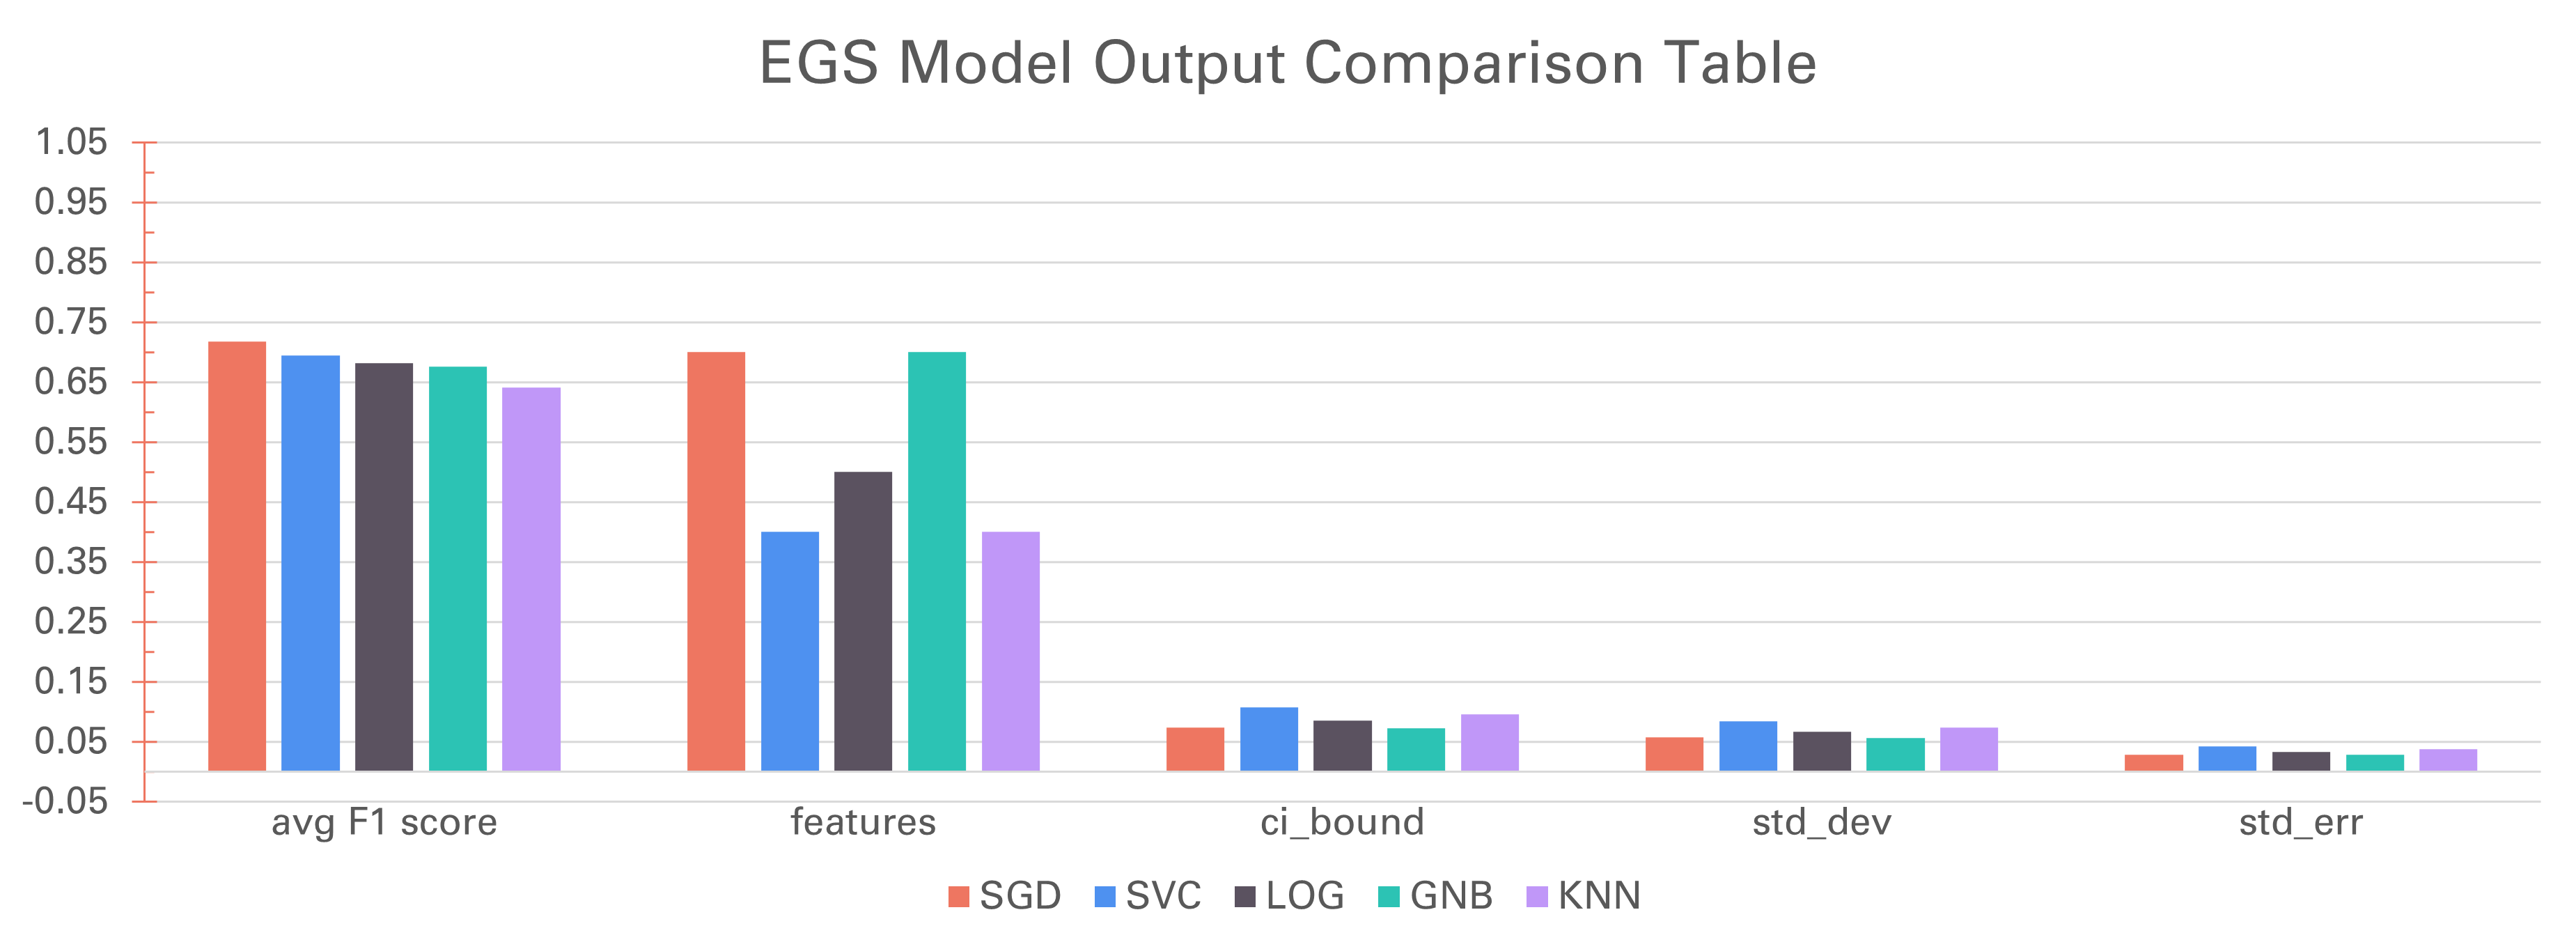
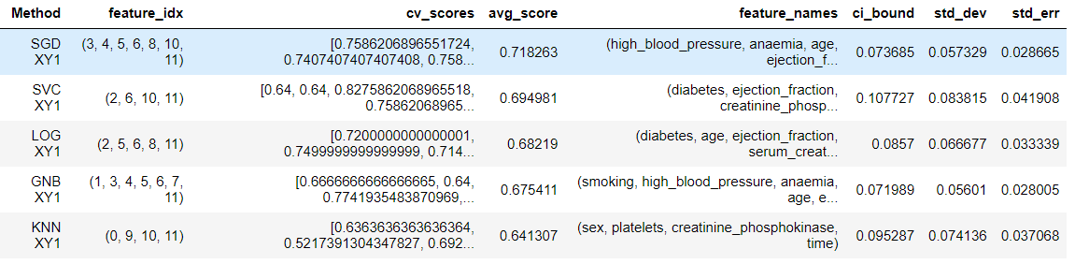
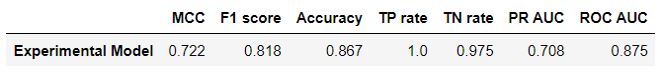
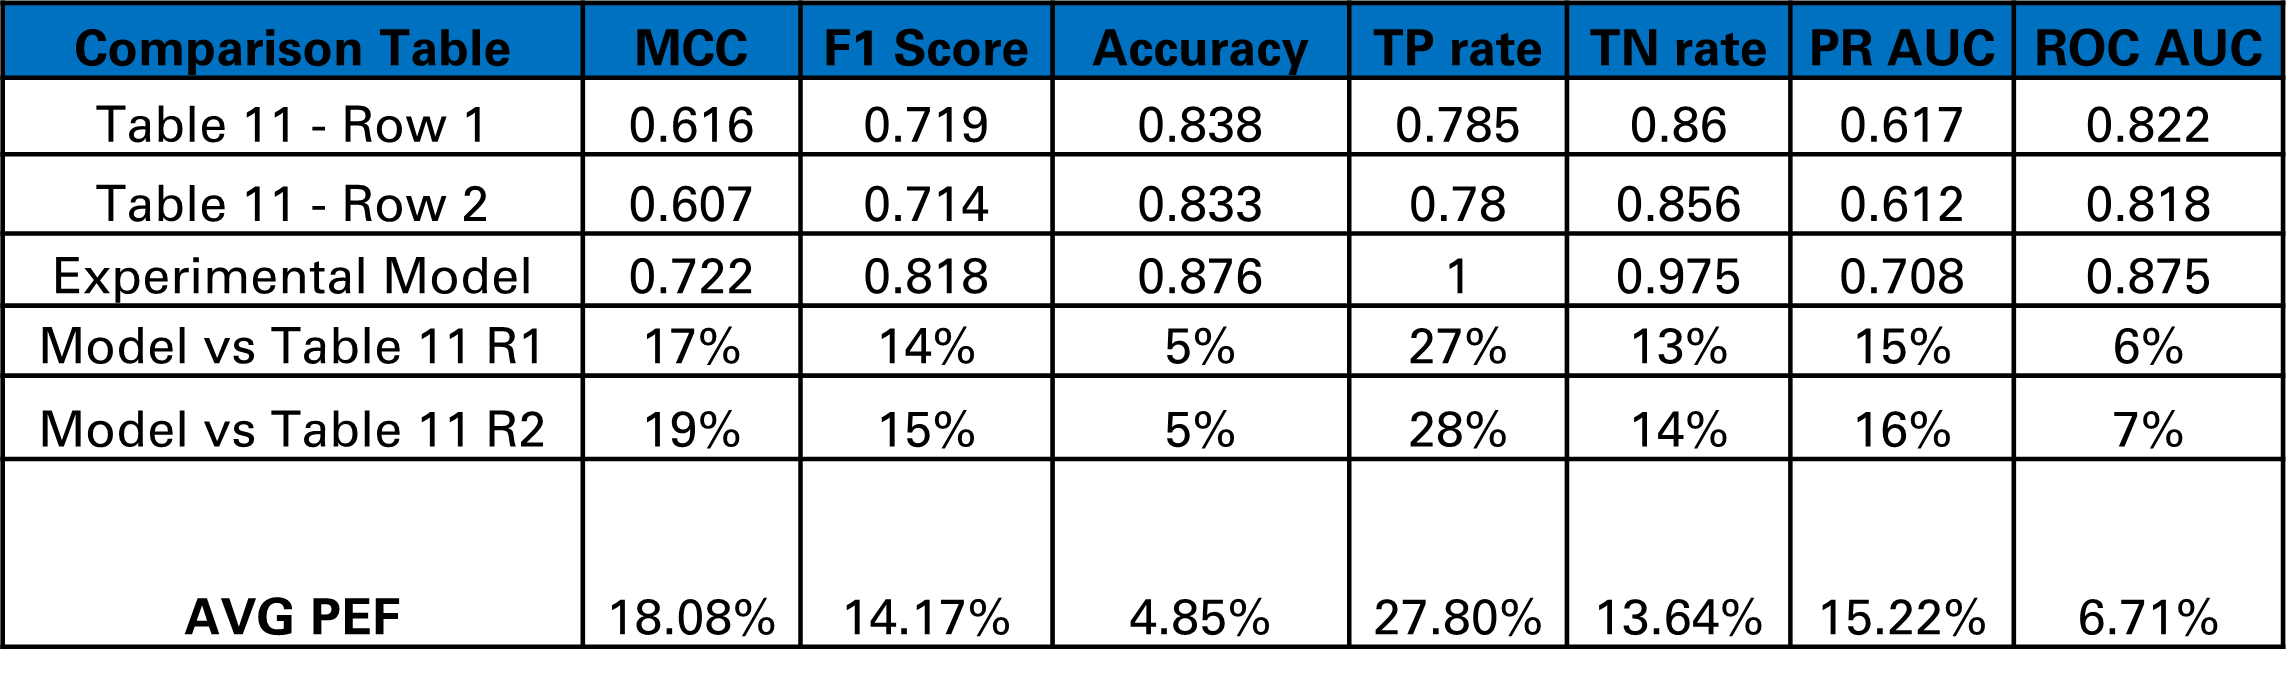
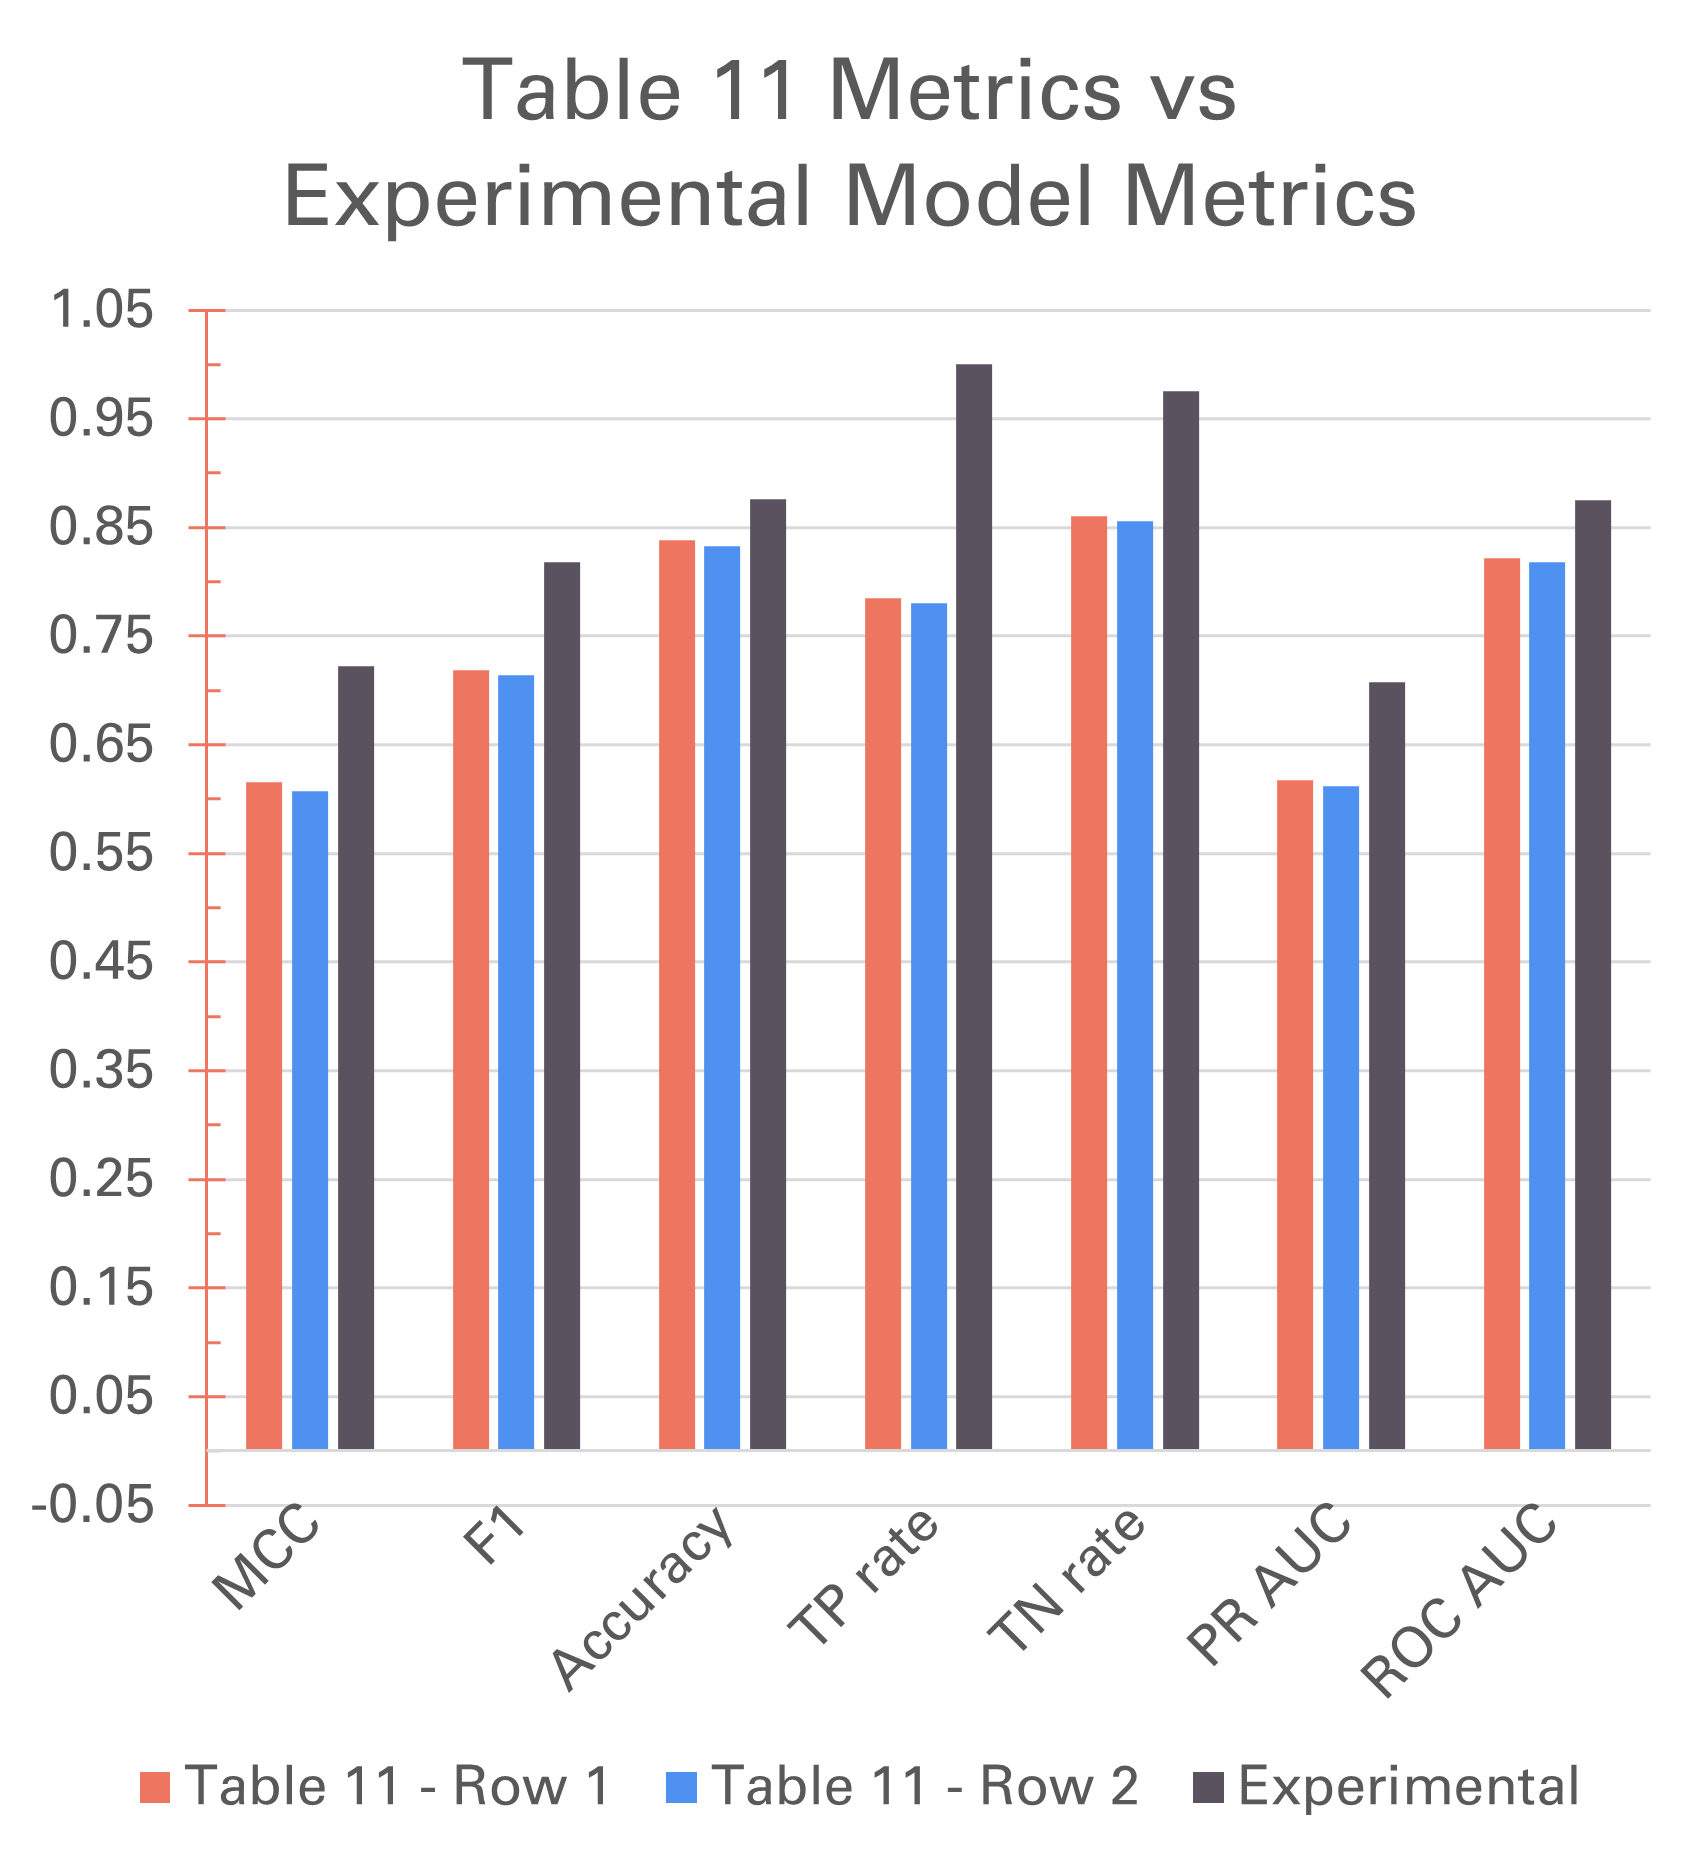

__vii) Compare and discuss results with respect to existing literatures.__

* My EFS model suggested that using the SGD ML model with the feature column indexs of (3,4,5,6,8,10,11) in image 1 and 2.
* The SGD avg F1 score was 0.718263, with a Std Dev of 0.057.
* This implies that in the out ranges of confidence, the F1 value could reach 0.718263 + (0.057 * 3).

* After updating my dataset and constructing my SGD model, it returned a model result in image 3. This model performed:
    * 18% better on average than the table 11 rows based on MCC.
    * 14.1% better on average than the table 11 rows based on F1 score.
    * 4.8% better on average than the table 11 rows based on Accuracy.
    * 27.8% better on average than the table 11 rows based on TP rate.
    * 13.6% better on average than the table 11 rows based on TN rate.
    * 15.2% better on average than the table 11 rows based on PR AUC.
    * 6.7% better on average than both the table 11 rows based on ROC AUC.
   
* Comparison is shown in the table in image 4 and the graph in image 5.

As stipulated in [4], a study conducted on “solid literature studies” and conducted massive computer experiments, the following recommendations are suggested for fair classifier evaluation.  

* The accuracy metric may be inappropriate when datasets are imbalanced. Balanced metrics such as the F score, harmonic mean or h measure. Careful consideration needs to be on a chosen metric based on a class bias. My model utilises the harmonic mean to establish a balanced evaluation. 

* Different classifier metrics reflect different insight into performance, Multiple metrics need to be utilised. My model utilises multiple metrics to give the optimal suggestion which is then evaluated based on another series of metrics to convey suitability. Simple metrics are easier to interpret and are utilised by my model as well.   

* Based on the No free lunch theorem, cross validation is vital to testing the premise that one singular test of a classifier is better than others, on average. While my model does use cross validation, the suggested method of T test is not used. However, my model can utilise T test for cross validation and can be adapted to use said metric.     

* As indicated in [5] by Gothane, classifier evaluation should take account the different classifiers that have different misclassification cost for each fault prediction. My model does not specifically consider misclassification aside from the model accuracy but the greater metrics at the end of the model do.  


__viii) Appropriate references (IEEE numbered).__

    [1] 	S. Tabe-Bordbar, A. Emad, S. Zhao and S. Sinha, "A closer look at cross-validation for assessing the accuracy of gene regulatory networks and models", Scientific Reports, vol. 8, no. 1, 2018. Available: 10.1038/s41598-018-24937-4.

    [2] 	D. Chicco and G. Jurman, "The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation", BMC Genomics, vol. 21, no. 1, 2020. Available: 10.1186/s12864-019-6413-7.

    [3] 	R. Pramono, S. Imtiaz and E. Rodriguez-Villegas, "Evaluation of features for classification of wheezes and normal respiratory sounds", PLOS ONE, vol. 14, no. 3, p. e0213659, 2019. Available: 10.1371/journal.pone.0213659.

    [4]	K. Stapor, P. Ksieniewicz, S. García and M. Woźniak, "How to design the fair experimental classifier evaluation", Applied Soft Computing, vol. 104, p. 107219, 2021. Available: 10.1016/j.asoc.2021.107219.

    [5]	S. Gothane, "Predictive Analysis In Data Mining Using Weighted Associative Classifier", Indian Journal of Applied Research, vol. 1, no. 6, pp. 115-119, 2011. Available: 10.15373/2249555x/mar2012/40.


In [3]:
neo=pd.read_csv (r"C:\Users\shane\Desktop\Study\University\T2 2021\SIT720 Assignments\A5\heart_failure_clinical_records_dataset.csv")
neo.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data = neo[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase','time','DEATH_EVENT']]
data

,sex,smoking,diabetes,high_blood_pressure,anaemia,age,ejection_fraction,serum_sodium,serum_creatinine,platelets,creatinine_phosphokinase,time,DEATH_EVENT
0,1,0,0,1,0,75.0,20,130,1.9,265000.00,582,4,1
1,1,0,0,0,0,55.0,38,136,1.1,263358.03,7861,6,1
2,1,1,0,0,0,65.0,20,129,1.3,162000.00,146,7,1
3,1,0,0,0,1,50.0,20,137,1.9,210000.00,111,7,1
4,0,0,1,0,1,65.0,20,116,2.7,327000.00,160,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1,1,1,0,62.0,38,143,1.1,155000.00,61,270,0
295,0,0,0,0,0,55.0,38,139,1.2,270000.00,1820,271,0
296,0,0,1,0,0,45.0,60,138,0.8,742000.00,2060,278,0
297,1,1,0,0,0,45.0,38,140,1.4,140000.00,2413,280,0


In [5]:
data.loc[data['time']<30,'time']=0
data.loc[data['time'].between(30,60),'time']=1
data.loc[data['time'].between(60,90),'time']=2
data.loc[data['time'].between(90,120),'time']=3
data.loc[data['time'].between(120,150),'time']=4
data.loc[data['time'].between(150,180),'time']=5
data.loc[data['time'].between(180,210),'time']=6
data.loc[data['time'].between(210,240),'time']=7
data.loc[data['time'].between(240,270),'time']=8
data.loc[data['time'].between(270,300),'time']=9
data.loc[data['time'].between(300,330),'time']=10
data.loc[data['time'].between(330,360),'time']=11
data.loc[data['time'].between(360,365),'time']=12
tdata = data
tdata

,sex,smoking,diabetes,high_blood_pressure,anaemia,age,ejection_fraction,serum_sodium,serum_creatinine,platelets,creatinine_phosphokinase,time,DEATH_EVENT
0,1,0,0,1,0,75.0,20,130,1.9,265000.00,582,0,1
1,1,0,0,0,0,55.0,38,136,1.1,263358.03,7861,0,1
2,1,1,0,0,0,65.0,20,129,1.3,162000.00,146,0,1
3,1,0,0,0,1,50.0,20,137,1.9,210000.00,111,0,1
4,0,0,1,0,1,65.0,20,116,2.7,327000.00,160,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,1,1,1,0,62.0,38,143,1.1,155000.00,61,8,0
295,0,0,0,0,0,55.0,38,139,1.2,270000.00,1820,9,0
296,0,0,1,0,0,45.0,60,138,0.8,742000.00,2060,9,0
297,1,1,0,0,0,45.0,38,140,1.4,140000.00,2413,9,0


In [6]:
scale = MinMaxScaler()

In [7]:
bx=tdata
bx=scale.fit_transform(bx)
bx=pd.DataFrame(bx)
bx.columns = ['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase','time','DEATH_EVENT']
bx

,sex,smoking,diabetes,high_blood_pressure,anaemia,age,ejection_fraction,serum_sodium,serum_creatinine,platelets,creatinine_phosphokinase,time,DEATH_EVENT
0,1.0,0.0,0.0,1.0,0.0,0.636364,0.090909,0.485714,0.157303,0.290823,0.071319,0.000000,1.0
1,1.0,0.0,0.0,0.0,0.0,0.272727,0.363636,0.657143,0.067416,0.288833,1.000000,0.000000,1.0
2,1.0,1.0,0.0,0.0,0.0,0.454545,0.090909,0.457143,0.089888,0.165960,0.015693,0.000000,1.0
3,1.0,0.0,0.0,0.0,1.0,0.181818,0.090909,0.685714,0.157303,0.224148,0.011227,0.000000,1.0
4,0.0,0.0,1.0,0.0,1.0,0.454545,0.090909,0.085714,0.247191,0.365984,0.017479,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.0,1.0,1.0,1.0,0.0,0.400000,0.363636,0.857143,0.067416,0.157474,0.004848,0.888889,0.0
295,0.0,0.0,0.0,0.0,0.0,0.272727,0.363636,0.742857,0.078652,0.296884,0.229268,1.000000,0.0
296,0.0,0.0,1.0,0.0,0.0,0.090909,0.696970,0.714286,0.033708,0.869075,0.259888,1.000000,0.0
297,1.0,1.0,0.0,0.0,0.0,0.090909,0.363636,0.771429,0.101124,0.139290,0.304925,1.000000,0.0


In [8]:
# Base Data > Normalised > Split
b1x = bx[['sex','smoking','diabetes','high_blood_pressure','anaemia','age','ejection_fraction','serum_sodium','serum_creatinine','platelets','creatinine_phosphokinase','time']]
b1y = bx[['DEATH_EVENT']]
b1y = np.ravel(b1y)
b1x_trainz, b1x_testz, b1y_trainz, b1y_testz = train_test_split(b1x, b1y, test_size=0.2)

In [113]:
# LOGR-EFS
efs1 = EFS(LogisticRegression(), min_features=1, max_features=10, scoring='f1', cv=5)

efs1 = efs1.fit(b1x_trainz, b1y_trainz)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
row_1=df.iloc[0]
LOG1=row_1.to_frame().T

Features: 4082/4082

In [114]:
# SGD-EFS
efs1 = EFS(SGDClassifier(), min_features=1, max_features=10,scoring='f1',cv=5)

efs1 = efs1.fit(b1x_trainz, b1y_trainz)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
row_1=df.iloc[0]
SGD1=row_1.to_frame().T

Features: 4082/4082

In [115]:
# SVC-EFS
efs1 = EFS(SVC(), min_features=1, max_features=10,scoring='f1',cv=5)

efs1 = efs1.fit(b1x_trainz, b1y_trainz)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
row_1=df.iloc[0]
SVC1=row_1.to_frame().T

Features: 4082/4082

In [116]:
# KNN-EFS
efs1 = EFS(KNeighborsClassifier(n_neighbors=2), min_features=1, max_features=10,scoring='f1',cv=5)

efs1 = efs1.fit(b1x_trainz, b1y_trainz)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
row_1=df.iloc[0]
KNN1=row_1.to_frame().T

Features: 4082/4082

In [117]:
# NB-EFS
efs1 = EFS(GaussianNB(), min_features=1, max_features=10,scoring='f1',cv=5)

efs1 = efs1.fit(b1x_trainz, b1y_trainz)

df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
row_1=df.iloc[0]
GNB1=row_1.to_frame().T

Features: 4082/4082

In [118]:
LOG1.insert(0,"Method","LOG XY1")
SGD1.insert(0,"Method","SGD XY1")
SVC1.insert(0,"Method","SVC XY1")
KNN1.insert(0,"Method","KNN XY1")
GNB1.insert(0,"Method","GNB XY1")

In [119]:
frames = [LOG1,SGD1,SVC1,KNN1,GNB1]
result = pd.concat(frames)
result = result.sort_values(by=['avg_score'],ascending=False)
result

,Method,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
3273,SGD XY1,"(3, 4, 5, 6, 8, 10, 11)","[0.7586206896551724, 0.7407407407407408, 0.758...",0.718263,"(high_blood_pressure, anaemia, age, ejection_f...",0.073685,0.057329,0.028665
656,SVC XY1,"(2, 6, 10, 11)","[0.64, 0.64, 0.8275862068965518, 0.75862068965...",0.694981,"(diabetes, ejection_fraction, creatinine_phosp...",0.107727,0.083815,0.041908
1430,LOG XY1,"(2, 5, 6, 8, 11)","[0.7200000000000001, 0.7499999999999999, 0.714...",0.68219,"(diabetes, age, ejection_fraction, serum_creat...",0.0857,0.066677,0.033339
3100,GNB XY1,"(1, 3, 4, 5, 6, 7, 11)","[0.6666666666666665, 0.64, 0.7741935483870969,...",0.675411,"(smoking, high_blood_pressure, anaemia, age, e...",0.071989,0.05601,0.028005
462,KNN XY1,"(0, 9, 10, 11)","[0.6363636363636364, 0.5217391304347827, 0.692...",0.641307,"(sex, platelets, creatinine_phosphokinase, time)",0.095287,0.074136,0.037068


In [9]:
# Manipulate the test data based on optimization table above

b1x_trainz = b1x_trainz.drop(b1x_trainz.columns[[0,1,2,7,9]], axis=1)
b1x_testz = b1x_testz.drop(b1x_testz.columns[[0,1,2,7,9]], axis=1)

In [171]:
OGarray = np.empty([0,7],int)

for i in range(100):
    # run model and get prediction variable
    sgd=SGDClassifier()
    sgd.fit(b1x_trainz,b1y_trainz)
    y_predz=sgd.predict(b1x_testz)

    #metrics
    n1 = matthews_corrcoef(b1y_testz, y_predz)
    n2 = f1_score(b1y_testz, y_predz)
    n3 = accuracy_score(b1y_testz, y_predz)
    k0 = confusion_matrix(b1y_testz, y_predz)
    n4 = TP = k0[1][1] / (k0[1][1]+k0[1][0])
    n5 = TN = k0[0][0] / (k0[0][0]+k0[0][1])
    n6 = average_precision_score(b1y_testz, y_predz)
    n7 = roc_auc_score(b1y_testz,y_predz)
    # populate metrics into dataframe
    OGarray = np.append(OGarray,np.array([[n1,n2,n3,n4,n5,n6,n7]]), axis=0)

# Calculate the mean values of our result array
MLmodelx = pd.DataFrame(OGarray)
MLmodelx.columns = ['MCC','F1 score','Accuracy','TP rate','TN rate','PR AUC','ROC AUC']
MLSumx = MLmodelx.max(axis=0)
MLSumx = pd.DataFrame(MLSumx)
MLSumx = MLSumx.transpose()

# Cleaning up the results
MLx = MLSumx.rename(index={0:'Experimental Model'})
MLx['MCC']=MLx['MCC'].round(decimals = 3)
MLx['F1 score']=MLx['F1 score'].round(decimals = 3)
MLx['Accuracy']=MLx['Accuracy'].round(decimals = 3)
MLx['TP rate']=MLx['TP rate'].round(decimals = 3)
MLx['TN rate']=MLx['TN rate'].round(decimals = 3)
MLx['PR AUC']=MLx['PR AUC'].round(decimals = 3)
MLx['ROC AUC']=MLx['ROC AUC'].round(decimals = 3)
MLx

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Experimental Model,0.722,0.818,0.867,1.0,0.975,0.708,0.875
